In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

TOP_POSTER_LIMIT = 10
DOMAIN_LIMIT = 25
REPLIES_THRESHOLD = 150

df = pd.read_csv("data/latest-articles.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"], unit='s')
df["title"] = df["title"].astype("category")
df["posted_by"] = df["posted_by"].astype("category")
df["source_url"] = df["source_url"].astype("category")

In [2]:
# A thread is considered sourced if it has a URL link.
sourced = df[df.source_url != ""]

# This is not entirely accurate since some vanity posts have links.
vanity = df[df.source_url == ""]

In [3]:
def extract_domain(url) -> str:
    return (
        url.
            replace("www.","").
            replace("http://", "").
            replace("https://", "").
            split("/")[0]
    )


sourced.insert(len(sourced.columns)-1, "domain", (
    sourced.
        source_url.
        apply(extract_domain).
        astype("category")
))

<Axes: xlabel='count', ylabel='domain'>

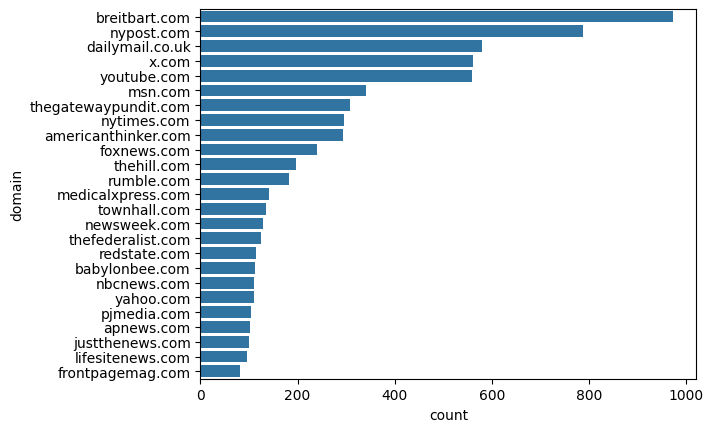

In [4]:
# Draws a chart that shows where discussion for a particular thread originated from.
data = sourced[["source_url", "domain"]].drop_duplicates()
top_sourced_domains = data.domain.value_counts().iloc[:DOMAIN_LIMIT].index
sns.countplot(
    y="domain",
    data=data,
    order=top_sourced_domains,
)

<Axes: xlabel='count', ylabel='posted_by'>

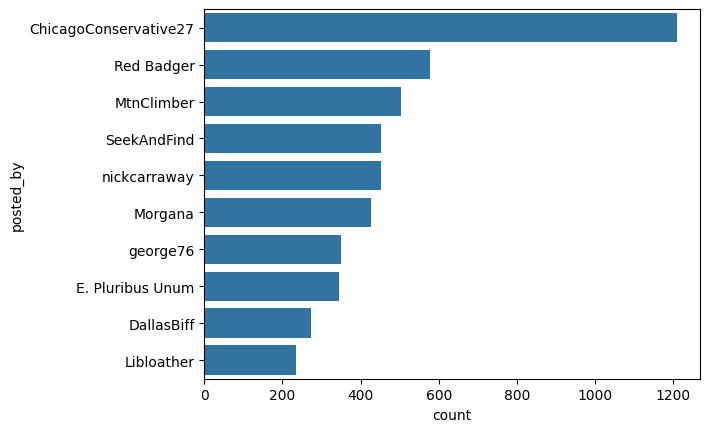

In [5]:
# Draws a chart that shows who posted a topic to be discussed that has a URL source.
data = sourced[["source_url", "posted_by"]].drop_duplicates()
top_sourced_posters = data.posted_by.value_counts().iloc[:TOP_POSTER_LIMIT].index
sns.countplot(
    y="posted_by",
    data=data,
    order=top_sourced_posters,
)

In [6]:
# Comment this if you don't want to see everything.
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Draws a table that shows which freepers posted topics from a sourced link that originated
# from a particular domain.
who_is_posting_from_what = (
    sourced[["posted_by", "source_url", "domain"]].
    query("posted_by in @top_sourced_posters and domain in @top_sourced_domains").
    drop_duplicates().
    groupby(["domain", "posted_by"])
)
who_is_posting_from_what[["domain"]].describe()

/tmp/ipykernel_876728/2178239382.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby(["domain", "posted_by"])


domain         \
                                            count unique   
domain               posted_by                             
americanthinker.com  MtnClimber               182      1   
                     Red Badger                 1      1   
                     SeekAndFind               55      1   
                     george76                   1      1   
apnews.com           Red Badger                 8      1   
                     george76                   2      1   
                     DallasBiff                 8      1   
                     Libloather                 1      1   
                     nickcarraway               5      1   
babylonbee.com       E. Pluribus Unum           8      1   
                     Morgana                    1      1   
breitbart.com        Red Badger                 9      1   
                     george76                   5      1   
                     E. Pluribus Unum           6      1   
                     Morgana                   11      1   
                     ChicagoConservative27    779      1   
dailymail.co.uk      MtnClimber                 1      1   
                     Red Badger                 8      1   
                     george76                   8      1   
                     Libloather                33      1   
                     nickcarraway               2      1   
                     Morgana                  108      1   
                     ChicagoConservative27      3      1   
foxnews.com          MtnClimber                 1      1   
                     Red Badger                 1      1   
                     SeekAndFind                2      1   
                     george76                   7      1   
                     DallasBiff                 9      1   
                     Libloather                 9      1   
                     nickcarraway               7      1   
                     E. Pluribus Unum           1      1   
                     Morgana                    3      1   
                     ChicagoConservative27      6      1   
frontpagemag.com     MtnClimber                 8      1   
                     george76                   4      1   
                     E. Pluribus Unum           5      1   
justthenews.com      Red Badger                 3      1   
                     george76                   6      1   
                     E. Pluribus Unum           5      1   
msn.com              SeekAndFind               12      1   
                     DallasBiff                19      1   
                     Libloather                 2      1   
                     nickcarraway              13      1   
                     E. Pluribus Unum           2      1   
                     ChicagoConservative27      2      1   
nbcnews.com          Red Badger                 7      1   
                     SeekAndFind                1      1   
                     george76                   1      1   
                     DallasBiff                 9      1   
                     nickcarraway               3      1   
                     ChicagoConservative27      1      1   
newsweek.com         MtnClimber                 1      1   
                     Red Badger                 5      1   
                     george76                   2      1   
                     DallasBiff                10      1   
                     Libloather                 2      1   
                     nickcarraway               9      1   
                     E. Pluribus Unum           2      1   
                     Morgana                    1      1   
nypost.com           MtnClimber                 2      1   
                     Red Badger                 6      1   
                     SeekAndFind                3      1   
                     george76                  28      1   
                     DallasBiff                11      1   
                     Li

In [7]:
# Display which posts got the most replies before
# they aged out from the front page.

(sourced[['timestamp', 'title', 'replies']].
     loc[sourced.replies > REPLIES_THRESHOLD].
     groupby('title').
     max().
     sort_values('replies', ascending=False).
     dropna())

/tmp/ipykernel_876728/1921096508.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby('title').


,timestamp,replies
title,,
Matt Gaetz withdraws his name to become Trump's attorney general,2024-11-21 19:33:47,275.0
President Biden set to issue a pardon of his son Hunter Biden,2024-12-02 03:34:54,202.0
Sounds like Kamala is loaded for “Baier” tonight.,2024-10-17 00:51:23,182.0
Donald Trump chooses Matt Gaetz as Attorney General,2024-11-13 21:25:03,162.0
Trump AG pick Matt Gaetz says he's withdrawing,2024-11-21 19:33:46,162.0
"Donald Trump groped me in what felt like a ‘twisted game’ with Jeffrey Epstein, former model alleges",2024-10-24 00:52:35,157.0
Trump Taps US Senator Marco Rubio for Secretary of State,2024-11-12 08:42:10,151.0
